## Importing packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
brp = pd.read_csv("day.csv")
brp.tail()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


## For input data

In [3]:
# sample test: 2011-01-05	1	0	1	0	3	1	1	0.226957	0.229270	0.436957	0.186900	82	1518	1600

print("Sample case : 2011-01-05	1	0	1	0	3	1	1	0.226957	0.229270	0.436957	0.186900	c-82	r-1518	cnt-1600")

dteday = input('Enter date')
season = int(input('Enter season'))
yr = int(input('Enter yr'))
month = int(input('Enter month'))
holiday = int(input('Enter holiday'))
weekday = int(input('Enter weekday'))
workingday = int(input('Enter workingday'))
weathersit = int(input('Enter weathersit'))
temp = float(input('Enter temp'))
atemp = float(input('Enter atemp'))
hum = float(input('Enter humidity'))
windspeed = float(input('Enter windspeed'))

brp.dtypes

Sample case : 2011-01-05	1	0	1	0	3	1	1	0.226957	0.229270	0.436957	0.186900	c-82	r-1518	cnt-1600
Enter date2011-01-05
Enter season1
Enter yr0
Enter month1
Enter holiday0
Enter weekday3
Enter workingday1
Enter weathersit1
Enter temp0.2269
Enter atemp0.2292
Enter humidity0.4369
Enter windspeed0.1869


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
brp.shape

(731, 16)

In [5]:
brp = brp.rename(columns = {'mnth':'month', 'cnt':'count'})
print(brp.shape)
brp.head()

(731, 16)


,instant,dteday,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
print(brp.dtypes)
brp.columns

instant         int64
dteday         object
season          int64
yr              int64
month           int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


Index(['instant', 'dteday', 'season', 'yr', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

## Outlier Analysis

season


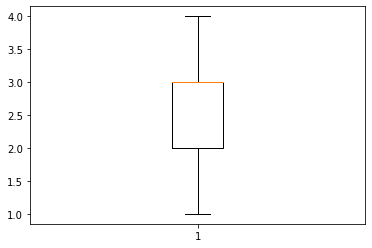

yr


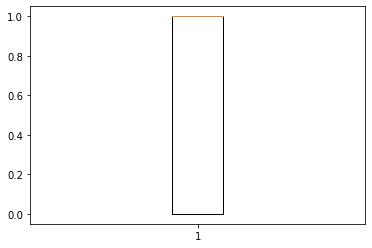

month


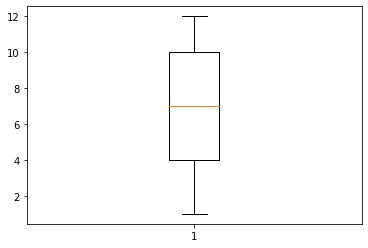

weekday


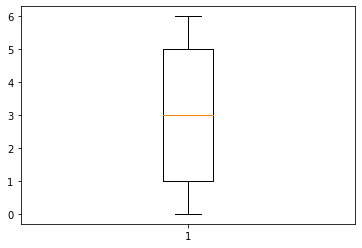

workingday


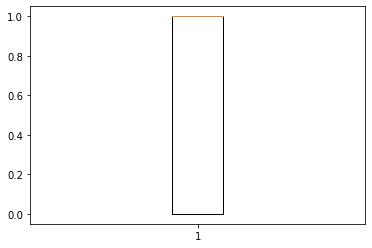

weathersit


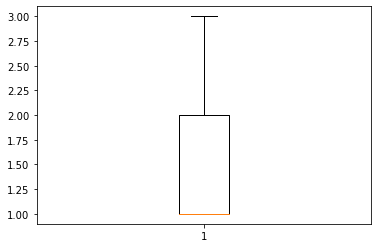

temp


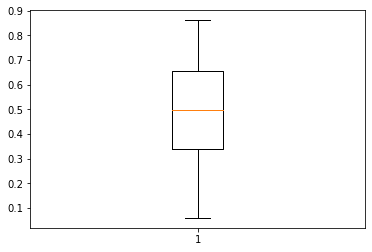

atemp


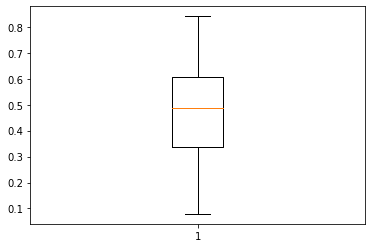

hum


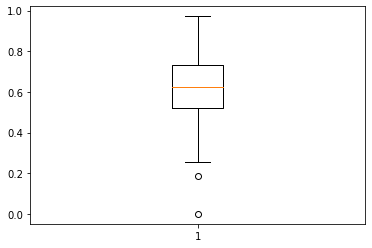

windspeed


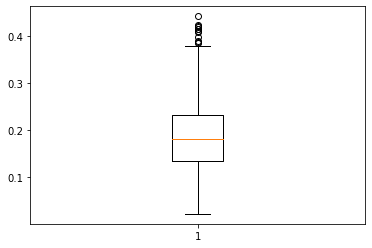

(717, 16)

In [7]:
# Checkpoint
temp_brp = brp.copy()

# Outlier Analysis 
import matplotlib.pyplot as plt

# B-Removing holiday from the list as their are very less no. of holidays(i.e 1's) in 'holiday' column. 

colnames=[ 'season', 'yr', 'month', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

for column in colnames: 
    q75, q25 = np.percentile(brp.loc[:,column],[75,25])
    print(column)
    plt.show(plt.boxplot(brp[column]))
#   Calculate IQR
    iqr = q75 - q25

    # Calculate inner and outer fence.
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    # print(minimum,maximum)

    # Drop
    indexNames = brp[brp[column] < minimum].index
    brp.drop(indexNames , inplace=True)
    
    indexNames = brp[brp[column] > maximum].index
    brp.drop(indexNames , inplace=True)
    
#     replace by nan.
#     bld.loc[bld[column] < minimum ,:column] = np.nan
#     bld.loc[bld[column] > maximum ,:column] = np.nan


# brp=pd.DataFrame(KNN(k=3).fit_transform(brp), columns=brp.columns)
    
brp.shape


In [8]:
instant = brp['instant'].iloc[-1] + 1
brp.loc[instant-1] = [str(instant), str(dteday), str(season), str(yr), str(month), str(holiday), str(weekday), str(workingday),
                     str(weathersit), str(temp), str(atemp), str(hum), str(windspeed), '1518', '1600', '3118']


lis = ['instant', 'season', 'yr', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'casual', 'registered', 'count' ]
for i in lis:
    print(i)
    brp[i] = brp[i].astype('int64')
lis = ['temp', 'atemp', 'hum', 'windspeed']        
for i in lis:
    brp[i] = brp[i].astype('float')
brp.iloc[-1]['casual'] = 'NaN'
brp.iloc[-1]['registered'] = 'NaN'
brp.iloc[-1]['count'] = 'NaN'
    
print(brp.iloc[-1])
brp.dtypes

instant
season
yr
month
holiday
weekday
workingday
weathersit
casual
registered
count
instant              732
dteday        2011-01-05
season                 1
yr                     0
month                  1
holiday                0
weekday                3
workingday             1
weathersit             1
temp              0.2269
atemp             0.2292
hum               0.4369
windspeed         0.1869
casual              1518
registered          1600
count               3118
Name: 731, dtype: object


c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

instant         int64
dteday         object
season          int64
yr              int64
month           int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
count_actual_value=brp.loc[731,'count']
casual_describe = brp['casual'].copy()
registered_describe = brp['registered'].copy()
casual_actual_value = casual_describe[731]
registered_actual_value = registered_describe[731]
casual_actual_value
registered_actual_value

1600

In [10]:
count_actual_value

3118

## Feature Extraction

In [11]:
# ### Standardisation of variables.
cnames=['season', 'yr', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']
# cnames=['season', 'yr', 'month', 'holiday', 'weekday', 'workingday',
#        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

for i in cnames:
    print(i)
    brp[i] = (brp[i] - brp[i].mean())/brp[i].std()
brp.head(10)

# ### Normalisation of variables.
# for i in cnames:
#     print(i)
#     brp[i] = (brp[i] - np.min(brp[i]))/(np.max(brp[i]) - np.min(brp[i]))
brp.tail(5)

season
yr
month
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
count


,instant,dteday,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
727,728,2012-12-28,-1.36604,1.002091,1.581679,-0.173457,1.001917,0.677281,1.112499,-1.325898,-1.352479,-0.296388,-0.429582,-0.310293,-0.784084,-0.742854
728,729,2012-12-29,-1.36604,1.002091,1.581679,-0.173457,1.501831,-1.474435,1.112499,-1.325898,-1.429919,0.873030,-0.862951,-1.013972,-1.598320,-1.650292
729,730,2012-12-30,-1.36604,1.002091,1.581679,-0.173457,-1.497653,-1.474435,-0.727995,-1.312294,-1.495442,-1.062043,2.292674,-0.716541,-1.437911,-1.414896
730,731,2012-12-31,-1.36604,1.002091,1.581679,-0.173457,-0.997739,0.677281,1.112499,-1.529962,-1.545735,-0.386113,-0.438295,-0.607725,-0.887388,-0.932205
731,732,2011-01-05,-1.36604,-0.996524,-1.613231,-0.173457,0.002089,0.677281,-0.727995,-1.469739,-1.510751,-1.395339,0.008540,0.957780,-1.330117,-0.730955


## Coorelation Analysis

(718, 16)


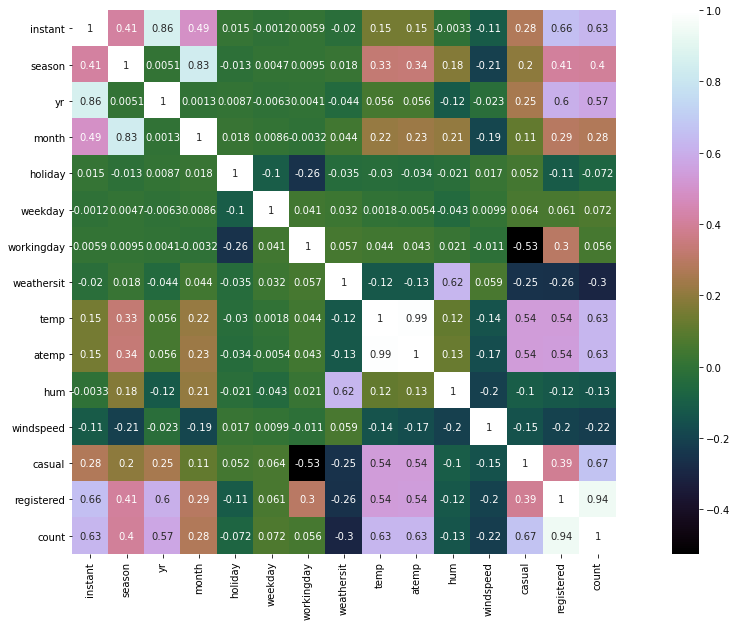

In [12]:
# ### Correlation Analysis : Only for continuous numeric variables.
#   # Correlation plot.NOTE:cp is only for continuous numeric variables.
#   # Extreme Blue:highly positively correlated.
#   # Extreme Red :highly negatively correlated.
colnames=['season', 'yr', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']
df_corr = brp.loc[:,colnames]
# print(df_corr.shape)

# Generate correlation matrix.
corr = df_corr.corr()

# # Plot using seaborn library.

corr_mat=brp.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

# brp = brp.drop(['workingday','atemp'],axis=1)
print(brp.shape)

In [13]:
# brp = brp.drop(['dteday','yr','holiday'], axis=1)
brp = brp.drop(['dteday','yr','holiday'], axis=1)
# brp.head()

## For input data

In [15]:
input_sample = brp.iloc[-1]
temp_series = brp.iloc[-1]

T_count = input_sample['count']
input_sample_actual = [input_sample['registered'], input_sample['casual']]
# input_sample_actual = input_sample['count']

input_sample_actual = np.reshape(input_sample_actual,(-1,2))

input_sample = input_sample.drop(['registered','casual','count'])


# Dropping the input sample
brp = brp.drop(brp.index[[len(brp)-1]])

In [16]:
input_sample_actual

array([[-1.33011654,  0.95777965]])

In [17]:
# brp.tail()
# input_sample = input_sample.to_frame().T
input_sample = input_sample.to_numpy()
# input_sample = np.reshape(input_sample, (-1,12))
input_sample = np.reshape(input_sample, (-1,10))
print(type(input_sample))
input_sample

<class 'numpy.ndarray'>


array([[ 7.32000000e+02, -1.36603985e+00, -1.61323122e+00,
         2.08877693e-03,  6.77281205e-01, -7.27994655e-01,
        -1.46973900e+00, -1.51075080e+00, -1.39533903e+00,
         8.53996009e-03]])

In [18]:
# input_sample_actual
brp.head()

,instant,season,month,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,-1.36604,-1.613231,1.501831,-1.474435,1.112499,-0.831607,-0.687580,1.252861,-0.360230,-0.764420,-1.937104,-1.834469
1,2,-1.36604,-1.613231,-1.497653,-1.474435,1.112499,-0.726522,-0.748118,0.465104,0.867791,-1.054597,-1.926838,-1.929662
2,3,-1.36604,-1.613231,-0.997739,0.677281,-0.727995,-1.635907,-1.754441,-1.392662,0.864585,-1.070557,-1.568163,-1.646153
3,4,-1.36604,-1.613231,-0.497825,0.677281,-0.727995,-1.616121,-1.615330,-0.293265,-0.362321,-1.087967,-1.423795,-1.535957
4,5,-1.36604,-1.613231,0.002089,0.677281,-0.727995,-1.469429,-1.510322,-1.394930,0.008540,-1.125690,-1.382731,-1.516297


## Applying PCA to check at least how many variables are needed to predict the data 

Text(0, 0.5, 'Cumulative explained variance')

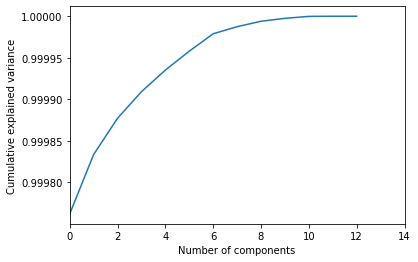

In [19]:
from sklearn.decomposition import PCA
pca = PCA().fit(brp)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Machine Learning Models:

## 1.Lasso Regression

(572, 10) (145, 10) (572, 2) (145, 2)

For Testing dataset:

mean square error 0.3431709126294342
mean absolute error 0.41954461847729363
Root mean square error 0.5858079144475894

r2 score:  0.6753335166513472


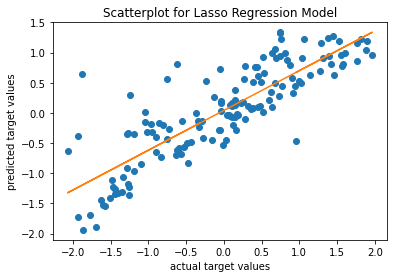

In [20]:
temp_brp = brp.copy()

# Dividing data into train and test.
# X = temp_brp.values[:len(temp_brp)-1,0:len(temp_brp.columns)-3]
# Y = temp_brp.values[:len(temp_brp)-1, len(temp_brp.columns)-3:len(temp_brp.columns)-1]

X = temp_brp.values[:len(temp_brp)-1, 0:len(temp_brp.columns)-3]
Y = temp_brp.values[:len(temp_brp)-1, len(temp_brp.columns)-3:len(temp_brp.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Adding input sample to testing data.

y_test = np.insert(y_test, len(y_test), input_sample_actual[0], axis=0)
x_test = np.insert(x_test, len(x_test)-1, np.array((input_sample)), 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Lasso_model = Lasso(alpha=0.1).fit(x_train, y_train)

import math

y_pred = Lasso_model.predict(x_test)
Lasso_mse = mean_squared_error(y_test, y_pred)
Lasso_mae = mean_absolute_error(y_test, y_pred)
Lasso_rmse =  math.sqrt(mean_squared_error(y_test, y_pred))
Lasso_r2score = r2_score(y_test, y_pred)

print("\nFor Testing dataset:\n")
print("mean square error",Lasso_mse)
print("mean absolute error", Lasso_mae)
print("Root mean square error",Lasso_rmse)
print("\nr2 score: ", Lasso_r2score)


##########################  Scatterplot ############################

yt = np.array(y_test[0:,1])
yp = np.array(y_pred[0:,1])
m, b = np.polyfit(yt, yp, 1)
plt.plot(yt, yp, 'o')
plt.plot(yt, m*yt + b) 
plt.title("Scatterplot for Lasso Regression Model") 
plt.xlabel("actual target values")
plt.ylabel("predicted target values") 
plt.show() 


## For input data


Actual value: 3118
Predicted value: 4165

For input data:
mean square error 2.6869301753502164
mean absolute error 1.625690551927217
Root mean square error 1.6391858269733228


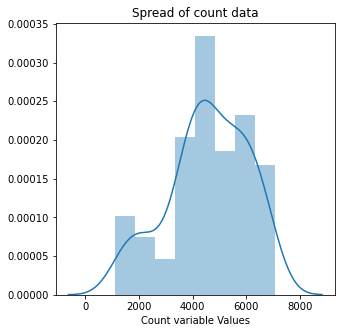

In [21]:
# dcv = destandardized_casual_values
# drv = destandardized_registered_values
# arr[0:2, 2]
dcv = y_pred[0:,0]*(casual_describe.std()) + casual_describe.mean() 
drv = y_pred[0:,1]*(registered_describe.std()) + registered_describe.mean() 

print("\nActual value:", count_actual_value)
print("Predicted value:", int(dcv[len(y_pred)-1] + drv[len(y_pred)-1]))

Lasso_mse = mean_squared_error(input_sample_actual, [y_pred[144]])
Lasso_mae = mean_absolute_error(input_sample_actual, [y_pred[144]])
Lasso_rmse = math.sqrt(mean_squared_error(input_sample_actual, [y_pred[144]]))

print("\nFor input data:")
print("mean square error", Lasso_mse)
print("mean absolute error",  Lasso_mae)
print("Root mean square error", Lasso_rmse)

##########################  Data distribution Curve  ##############################

plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dcv + drv)
plt.title("Spread of count data")
plt.xlabel("Count variable Values")
plt.show()


## 2. Decision Tree Model

(572, 10) (145, 10) (572, 2) (145, 2)

For Testing dataset:

mean square error 0.3128805714251789
mean absolute error 0.3707398831085963
Root mean square error 0.5593572842335915

r2 score:  0.7044906830648324


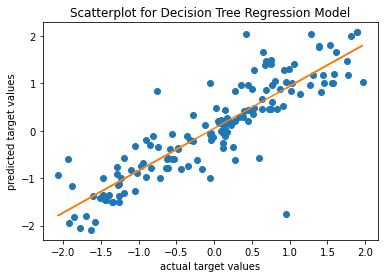

In [22]:

temp_brp = brp.copy()

X = temp_brp.values[:len(temp_brp)-1, 0:len(temp_brp.columns)-3]
Y = temp_brp.values[:len(temp_brp)-1, len(temp_brp.columns)-3:len(temp_brp.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Adding input sample to testing data.

y_test = np.insert(y_test, len(y_test), input_sample_actual[0], axis=0)
x_test = np.insert(x_test, len(x_test)-1, np.array((input_sample)), 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

DT_model = DecisionTreeRegressor( random_state=0).fit(x_train, y_train)

# B-For Testing dataset

import math

y_pred = DT_model.predict(x_test)
DT_mse = mean_squared_error(y_test, y_pred)
DT_mae = mean_absolute_error(y_test, y_pred)
DT_rmse =  math.sqrt(mean_squared_error(y_test, y_pred))
DT_r2score = r2_score(y_test, y_pred)

print("\nFor Testing dataset:\n")
print("mean square error",DT_mse)
print("mean absolute error", DT_mae)
print("Root mean square error",DT_rmse)
print("\nr2 score: ", DT_r2score)

##########################  Scatterplot ############################

yt = np.array(y_test[0:,1])
yp = np.array(y_pred[0:,1])
m, b = np.polyfit(yt, yp, 1)
plt.plot(yt, yp, 'o')
plt.plot(yt, m*yt + b) 
plt.title("Scatterplot for Decision Tree Regression Model") 
plt.xlabel("actual target values")
plt.ylabel("predicted target values") 
plt.show() 


### For input data


Actual value: 3118
Predicted value: 1495

For input data:
mean square error 4.08763951621205
mean absolute error 1.8062665397263888
Root mean square error 2.0217911653313876


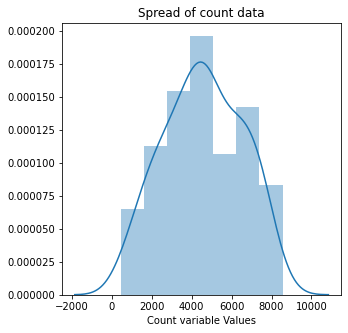

In [23]:
# dcv = destandardized_casual_values
# drv = destandardized_registered_values
# arr[0:2, 2]
dcv = y_pred[0:,0]*(casual_describe.std()) + casual_describe.mean() 
drv = y_pred[0:,1]*(registered_describe.std()) + registered_describe.mean() 

print("\nActual value:", count_actual_value)
print("Predicted value:", int(dcv[len(y_pred)-1] + drv[len(y_pred)-1]))

DT_mse = mean_squared_error(input_sample_actual, [y_pred[144]])
DT_mae = mean_absolute_error(input_sample_actual, [y_pred[144]])
DT_rmse = math.sqrt(mean_squared_error(input_sample_actual, [y_pred[144]]))

print("\nFor input data:")
print("mean square error", DT_mse)
print("mean absolute error",  DT_mae)
print("Root mean square error", DT_rmse)

##########################  Data distribution Curve  ##############################

plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dcv + drv)
plt.title("Spread of count data")
plt.xlabel("Count variable Values")
plt.show()


## 3.Random Forest Regressor

(572, 10) (145, 10) (572, 2) (145, 2)

For Testing dataset:

mean square error 0.36693688035326155
mean absolute error 0.4695423938569259
Root mean square error 0.6057531513358074

r2 score:  0.6507172734873036


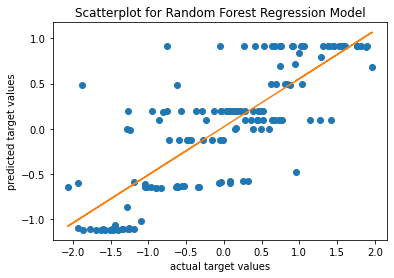

In [24]:

temp_brp = brp.copy()

X = temp_brp.values[:len(temp_brp)-1, 0:len(temp_brp.columns)-3]
Y = temp_brp.values[:len(temp_brp)-1, len(temp_brp.columns)-3:len(temp_brp.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Adding input sample to testing data.

y_test = np.insert(y_test, len(y_test), input_sample_actual[0], axis=0)
x_test = np.insert(x_test, len(x_test)-1, np.array((input_sample)), 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

RF_model = RandomForestRegressor(max_depth=2, random_state=0).fit(x_train, y_train)

# B-For Testing dataset

import math

y_pred = RF_model.predict(x_test)
RF_mse = mean_squared_error(y_test, y_pred)
RF_mae = mean_absolute_error(y_test, y_pred)
RF_rmse =  math.sqrt(mean_squared_error(y_test, y_pred))
RF_r2score = r2_score(y_test, y_pred)

print("\nFor Testing dataset:\n")
print("mean square error",RF_mse)
print("mean absolute error", RF_mae)
print("Root mean square error",RF_rmse)
print("\nr2 score: ", RF_r2score)


##########################  Scatterplot ############################

yt = np.array(y_test[0:,1])
yp = np.array(y_pred[0:,1])
m, b = np.polyfit(yt, yp, 1)
plt.plot(yt, yp, 'o')
plt.plot(yt, m*yt + b) 
plt.title("Scatterplot for Random Forest Regression Model") 
plt.xlabel("actual target values")
plt.ylabel("predicted target values") 
plt.show() 



## For input data


Actual value: 3118
Predicted value: 3755

For input data:
mean square error 1.8505567605860858
mean absolute error 1.358229741784005
Root mean square error 1.36035170473892


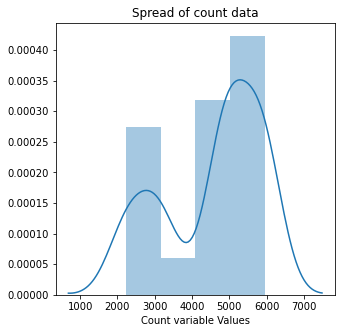

In [25]:
# dcv = destandardized_casual_values
# drv = destandardized_registered_values
# arr[0:2, 2]
dcv = y_pred[0:,0]*(casual_describe.std()) + casual_describe.mean() 
drv = y_pred[0:,1]*(registered_describe.std()) + registered_describe.mean() 

print("\nActual value:", count_actual_value)
print("Predicted value:", int(dcv[len(y_pred)-1] + drv[len(y_pred)-1]))

RF_mse = mean_squared_error(input_sample_actual, [y_pred[144]])
RF_mae = mean_absolute_error(input_sample_actual, [y_pred[144]])
RF_rmse = math.sqrt(mean_squared_error(input_sample_actual, [y_pred[144]]))

print("\nFor input data:")
print("mean square error", RF_mse)
print("mean absolute error",  RF_mae)
print("Root mean square error", RF_rmse)

##########################  Data distribution Curve  ##############################

plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dcv + drv)
plt.title("Spread of count data")
plt.xlabel("Count variable Values")
plt.show()


## 4.KNN Regressor

(572, 10) (145, 10) (572, 2) (145, 2)

For Testing dataset:

mean square error 0.3941783223300627
mean absolute error 0.4474457703709721
Root mean square error 0.6278362225374248

r2 score:  0.62947726716383


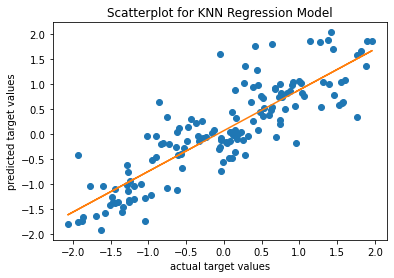

In [26]:
temp_brp = brp.copy()

X = temp_brp.values[:len(temp_brp)-1, 0:len(temp_brp.columns)-3]
Y = temp_brp.values[:len(temp_brp)-1, len(temp_brp.columns)-3:len(temp_brp.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Adding input sample to testing data.

y_test = np.insert(y_test, len(y_test), input_sample_actual[0], axis=0)
x_test = np.insert(x_test, len(x_test)-1, np.array((input_sample)), 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

KNN_model = KNeighborsRegressor(n_neighbors = 2).fit(x_train, y_train)

# B-For Testing dataset

import math

y_pred = KNN_model.predict(x_test)
KNN_mse = mean_squared_error(y_test, y_pred)
KNN_mae = mean_absolute_error(y_test, y_pred)
KNN_rmse =  math.sqrt(mean_squared_error(y_test, y_pred))
KNN_r2score = r2_score(y_test, y_pred)

print("\nFor Testing dataset:\n")
print("mean square error",KNN_mse)
print("mean absolute error", KNN_mae)
print("Root mean square error",KNN_rmse)
print("\nr2 score: ", KNN_r2score)


##########################  Scatterplot ############################

yt = np.array(y_test[0:,1])
yp = np.array(y_pred[0:,1])
m, b = np.polyfit(yt, yp, 1)
plt.plot(yt, yp, 'o')
plt.plot(yt, m*yt + b) 
plt.title("Scatterplot for KNN Regression Model") 
plt.xlabel("actual target values")
plt.ylabel("predicted target values") 
plt.show() 



## For input data


Actual value: 3118
Predicted value: 3927

For input data:
mean square error 0.9845898084935588
mean absolute error 0.9815712565876984
Root mean square error 0.9922649890495778


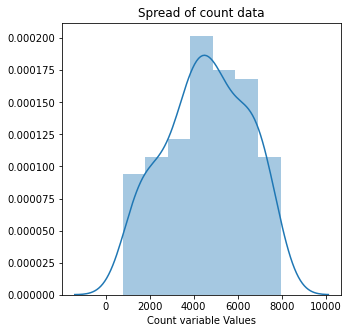

In [27]:
# dcv = destandardized_casual_values
# drv = destandardized_registered_values
# arr[0:2, 2]
dcv = y_pred[0:,0]*(casual_describe.std()) + casual_describe.mean() 
drv = y_pred[0:,1]*(registered_describe.std()) + registered_describe.mean() 

count_predicted_value=int(dcv[len(y_pred)-1] + drv[len(y_pred)-1])

print("\nActual value:", count_actual_value)
print("Predicted value:", count_predicted_value)

KNN_mse = mean_squared_error(input_sample_actual, [y_pred[144]])
KNN_mae = mean_absolute_error(input_sample_actual, [y_pred[144]])
KNN_rmse = math.sqrt(mean_squared_error(input_sample_actual, [y_pred[144]]))

print("\nFor input data:")
print("mean square error", KNN_mse)
print("mean absolute error",  KNN_mae)
print("Root mean square error", KNN_rmse)

##########################  Data distribution Curve  ##############################

plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dcv + drv)
plt.title("Spread of count data")
plt.xlabel("Count variable Values")
plt.show()


## 5.SVM model

(572, 10) (145, 10) (572, 2) (145, 2)
145

For Testing dataset:

mean square error 0.6413661941785626
mean absolute error 0.5687323451830747
Root mean square error 0.8008534161621355

r2 score:  0.39775191412749666


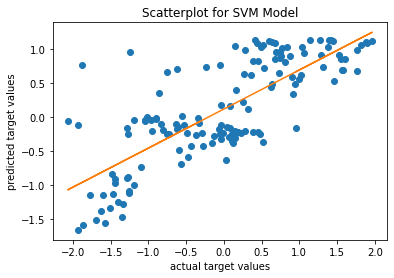

In [28]:
temp_brp = brp.copy()

X = temp_brp.values[:len(temp_brp)-1, 0:len(temp_brp.columns)-3]
Y = temp_brp.values[:len(temp_brp)-1, len(temp_brp.columns)-3:len(temp_brp.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Adding input sample to testing data.

y_test = np.insert(y_test, len(y_test), input_sample_actual[0], axis=0)
x_test = np.insert(x_test, len(x_test)-1, np.array((input_sample)), 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

SVM_model_casual = svm.SVR().fit(x_train, y_train[0:,0])
SVM_model_registered = svm.SVR().fit(x_train, y_train[0:,1])

import math

y_pred_c = SVM_model_casual.predict(x_test)
y_pred_r = SVM_model_registered.predict(x_test)

y_pred=[]
y_pred=np.array(y_pred)

for i in range(0, len(y_pred_c)):
    y_pred=np.insert(y_pred, len(y_pred), [y_pred_c[i], y_pred_r[i]], axis = 0)

size = int(len(y_pred)/2)
y_pred=y_pred.reshape(size, 2)
print(len(y_pred))

SVM_mse = mean_squared_error(y_test, y_pred)
SVM_mae = mean_absolute_error(y_test, y_pred)
SVM_rmse =  math.sqrt(mean_squared_error(y_test, y_pred))
SVM_r2score = r2_score(y_test, y_pred)

print("\nFor Testing dataset:\n")
print("mean square error",SVM_mse)
print("mean absolute error", SVM_mae)
print("Root mean square error",SVM_rmse)
print("\nr2 score: ", SVM_r2score)


##########################  Scatterplot ############################

yt = np.array(y_test[0:,1])
yp = np.array(y_pred[0:,1])
m, b = np.polyfit(yt, yp, 1)
plt.plot(yt, yp, 'o')
plt.plot(yt, m*yt + b) 
plt.title("Scatterplot for SVM Model") 
plt.xlabel("actual target values")
plt.ylabel("predicted target values") 
plt.show() 



Actual value: 3118
Predicted value: 4029

For input data:
mean square error 1.1009431074367453
mean absolute error 1.0465957371927908
Root mean square error 1.049258360670405


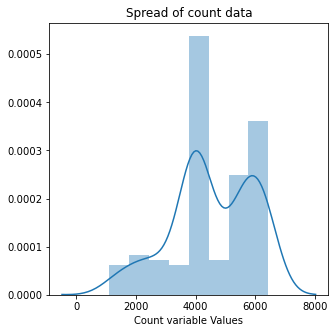

In [29]:
# dcv = destandardized_casual_values
# drv = destandardized_registered_values

dcv = y_pred[0:,0]*(casual_describe.std()) + casual_describe.mean() 
drv = y_pred[0:,1]*(registered_describe.std()) + registered_describe.mean() 

count_predicted_value=int(dcv[len(y_pred)-1] + drv[len(y_pred)-1])

print("\nActual value:", count_actual_value)
print("Predicted value:", count_predicted_value)

SVM_mse = mean_squared_error(input_sample_actual, [y_pred[144]])
SVM_mae = mean_absolute_error(input_sample_actual, [y_pred[144]])
SVM_rmse = math.sqrt(mean_squared_error(input_sample_actual, [y_pred[144]]))

print("\nFor input data:")
print("mean square error", SVM_mse)
print("mean absolute error",  SVM_mae)
print("Root mean square error", SVM_rmse)

##########################  Data distribution Curve  ##############################

plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dcv + drv)
plt.title("Spread of count data")
plt.xlabel("Count variable Values")
plt.show()


## 6.Multiple Linear Regression model

(572, 10) (145, 10) (572, 2) (145, 2)

For Testing dataset:

mean square error 0.26
mean absolute error 0.37
Root mean square error 0.51

r2 score:  0.75


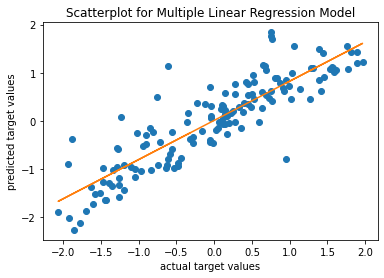

In [30]:
temp_brp = brp.copy()

X = temp_brp.values[:len(temp_brp)-1, 0:len(temp_brp.columns)-3]
Y = temp_brp.values[:len(temp_brp)-1, len(temp_brp.columns)-3:len(temp_brp.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Adding input sample to testing data.

y_test = np.insert(y_test, len(y_test), input_sample_actual[0], axis=0)
x_test = np.insert(x_test, len(x_test)-1, np.array((input_sample)), 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

LR_model = linear_model.Ridge().fit(x_train, y_train)

import math

y_pred = LR_model.predict(x_test)
LR_mse = mean_squared_error(y_test, y_pred)
LR_mae = mean_absolute_error(y_test, y_pred)
LR_rmse =  math.sqrt(mean_squared_error(y_test, y_pred))
LR_r2score = r2_score(y_test, y_pred)

print("\nFor Testing dataset:\n")
print("mean square error",round(LR_mse, 2))
print("mean absolute error", round(LR_mae, 2))
print("Root mean square error",round(LR_rmse, 2))
print("\nr2 score: ", round(LR_r2score, 2))



##########################  Scatterplot  ############################

yt = np.array(y_test[0:,1])
yp = np.array(y_pred[0:,1])
m, b = np.polyfit(yt, yp, 1)
plt.plot(yt, yp, 'o')
plt.plot(yt, m*yt + b) 
plt.title("Scatterplot for Multiple Linear Regression Model") 
plt.xlabel("actual target values")
plt.ylabel("predicted target values") 
plt.show() 




## For input data


Actual value: 3118
Predicted value: 3622

For input data:
mean square error 3.0847809981398076
mean absolute error 1.7562534970791652
Root mean square error 1.7563544625558383


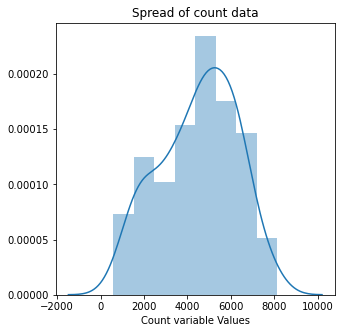

In [31]:
# dcv = destandardized_casual_values
# drv = destandardized_registered_values

dcv = y_pred[0:,0]*(casual_describe.std()) + casual_describe.mean() 
drv = y_pred[0:,1]*(registered_describe.std()) + registered_describe.mean() 

count_predicted_value=int(dcv[len(y_pred)-1] + drv[len(y_pred)-1])

print("\nActual value:", count_actual_value)
print("Predicted value:", count_predicted_value)

LR_mse = mean_squared_error(input_sample_actual, [y_pred[144]])
LR_mae = mean_absolute_error(input_sample_actual, [y_pred[144]])
LR_rmse = math.sqrt(mean_squared_error(input_sample_actual, [y_pred[144]]))

print("\nFor input data:")
print("mean square error", LR_mse)
print("mean absolute error",  LR_mae)
print("Root mean square error", LR_rmse)

##########################  Data distribution Curve  ##############################

plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dcv + drv)
plt.title("Spread of count data")
plt.xlabel("Count variable Values")
plt.show()


## 7. Gradient Boosting Model 

(572, 10) (145, 10) (572, 2) (145, 2)

For Testing dataset:

mean square error 0.14850671700386742
mean absolute error 0.25964238863914435
Root mean square error 0.38536569256210057

r2 score:  0.8592363809527677


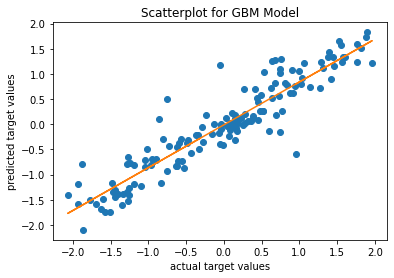

In [32]:

temp_brp = brp.copy()

X = temp_brp.values[:len(temp_brp)-1, 0:len(temp_brp.columns)-3]
Y = temp_brp.values[:len(temp_brp)-1, len(temp_brp.columns)-3:len(temp_brp.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Adding input sample to testing data.

y_test = np.insert(y_test, len(y_test), input_sample_actual[0], axis=0)
x_test = np.insert(x_test, len(x_test)-1, np.array((input_sample)), 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

GBM_model_casual = GradientBoostingRegressor(random_state=0).fit(x_train, y_train[0:,0])
GBM_model_registered = GradientBoostingRegressor(random_state=0).fit(x_train, y_train[0:,1])

import math

y_pred_c = GBM_model_casual.predict(x_test)
y_pred_r = GBM_model_registered.predict(x_test)

y_pred=[]
y_pred=np.array(y_pred)

for i in range(0, len(y_pred_c)):
    y_pred=np.insert(y_pred, len(y_pred), [y_pred_c[i], y_pred_r[i]], axis = 0)

size = int(len(y_pred)/2)
y_pred=y_pred.reshape(size, 2)

GBM_mse = mean_squared_error(y_test, y_pred)
GBM_mae = mean_absolute_error(y_test, y_pred)
GBM_rmse =  math.sqrt(mean_squared_error(y_test, y_pred))
GBM_r2score = r2_score(y_test, y_pred)

print("\nFor Testing dataset:\n")
print("mean square error",GBM_mse)
print("mean absolute error", GBM_mae)
print("Root mean square error",GBM_rmse)
print("\nr2 score: ", GBM_r2score)


##########################  Scatterplot ############################

yt = np.array(y_test[0:,1])
yp = np.array(y_pred[0:,1])
m, b = np.polyfit(yt, yp, 1)
plt.plot(yt, yp, 'o')
plt.plot(yt, m*yt + b) 
plt.title("Scatterplot for GBM Model") 
plt.xlabel("actual target values")
plt.ylabel("predicted target values") 
plt.show() 


## For input data


Actual value: 3118
Predicted value: 3976

For input data:
mean square error 2.948455530262597
mean absolute error 1.7097954623394533
Root mean square error 1.7171067323444391


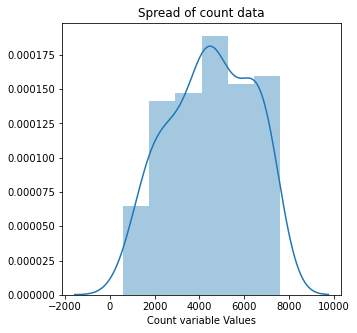

In [33]:
# dcv = destandardized_casual_values
# drv = destandardized_registered_values

dcv = y_pred[0:,0]*(casual_describe.std()) + casual_describe.mean() 
drv = y_pred[0:,1]*(registered_describe.std()) + registered_describe.mean() 

count_predicted_value=int(dcv[len(y_pred)-1] + drv[len(y_pred)-1])

print("\nActual value:", count_actual_value)
print("Predicted value:", count_predicted_value)

GBM_mse = mean_squared_error(input_sample_actual, [y_pred[144]])
GBM_mae = mean_absolute_error(input_sample_actual, [y_pred[144]])
GBM_rmse = math.sqrt(mean_squared_error(input_sample_actual, [y_pred[144]]))

print("\nFor input data:")
print("mean square error", GBM_mse)
print("mean absolute error",  GBM_mae)
print("Root mean square error", GBM_rmse)

##########################  Data distribution Curve  ##############################

plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dcv + drv)
plt.title("Spread of count data")
plt.xlabel("Count variable Values")
plt.show()


## 8. XGB Model

(572, 10) (145, 10) (572, 2) (145, 2)


c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +



For Testing dataset:

mean square error 0.12255537955166484
mean absolute error 0.23308414208408543
Root mean square error 0.35007910470587195

r2 score:  0.8837544675733378


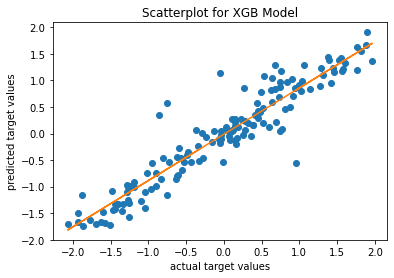

In [34]:
temp_brp = brp.copy()


X = temp_brp.values[:len(temp_brp)-1, 0:len(temp_brp.columns)-3]
Y = temp_brp.values[:len(temp_brp)-1, len(temp_brp.columns)-3:len(temp_brp.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Adding input sample to testing data.

y_test = np.insert(y_test, len(y_test), input_sample_actual[0], axis=0)
x_test = np.insert(x_test, len(x_test)-1, np.array((input_sample)), 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

XGB_model_casual = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.4, learning_rate = 0.2,
                max_depth = 4,  n_estimators = 100).fit(x_train, y_train[0:,0])
XGB_model_registered = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.4, learning_rate = 0.2,
                max_depth = 4,  n_estimators = 100).fit(x_train, y_train[0:,1])

import math

y_pred_c = XGB_model_casual.predict(x_test)
y_pred_r = XGB_model_registered.predict(x_test)

y_pred=[]
y_pred=np.array(y_pred)

for i in range(0, len(y_pred_c)):
    y_pred=np.insert(y_pred, len(y_pred), [y_pred_c[i], y_pred_r[i]], axis = 0)

size = int(len(y_pred)/2)
y_pred=y_pred.reshape(size, 2)

XGB_mse = mean_squared_error(y_test, y_pred)
XGB_mae = mean_absolute_error(y_test, y_pred)
XGB_rmse =  math.sqrt(mean_squared_error(y_test, y_pred))
XGB_r2score = r2_score(y_test, y_pred)

print("\nFor Testing dataset:\n")
print("mean square error",XGB_mse)
print("mean absolute error", XGB_mae)
print("Root mean square error",XGB_rmse)
print("\nr2 score: ", XGB_r2score)


##########################  Scatterplot ############################

yt = np.array(y_test[0:,1])
yp = np.array(y_pred[0:,1])
m, b = np.polyfit(yt, yp, 1)
plt.plot(yt, yp, 'o')
plt.plot(yt, m*yt + b) 
plt.title("Scatterplot for XGB Model") 
plt.xlabel("actual target values")
plt.ylabel("predicted target values") 
plt.show() 


## For input data


Actual value: 3118
Predicted value: 4017

For input data:
mean square error 2.8447100270509633
mean absolute error 1.6785699906596525
Root mean square error 1.686626819142564


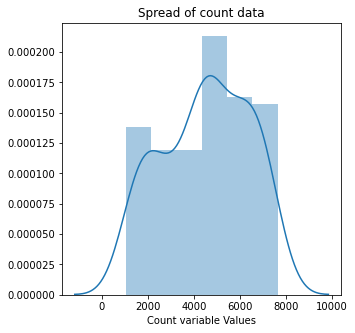

In [35]:
# dcv = destandardized_casual_values
# drv = destandardized_registered_values

dcv = y_pred[0:,0]*(casual_describe.std()) + casual_describe.mean() 
drv = y_pred[0:,1]*(registered_describe.std()) + registered_describe.mean() 

count_predicted_value=int(dcv[len(y_pred)-1] + drv[len(y_pred)-1])

print("\nActual value:", count_actual_value)
print("Predicted value:", count_predicted_value)

XGB_mse = mean_squared_error(input_sample_actual, [y_pred[144]])
XGB_mae = mean_absolute_error(input_sample_actual, [y_pred[144]])
XGB_rmse = math.sqrt(mean_squared_error(input_sample_actual, [y_pred[144]]))

print("\nFor input data:")
print("mean square error", XGB_mse)
print("mean absolute error",  XGB_mae)
print("Root mean square error", XGB_rmse)

##########################  Data distribution Curve  ##############################

plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dcv + drv)
plt.title("Spread of count data")
plt.xlabel("Count variable Values")
plt.show()


## 9. Ridge Regression Model

(572, 10) (145, 10) (572, 2) (145, 2)

For Testing dataset:

mean square error 2.8447100270509633
mean absolute error 1.6785699906596525
Root mean square error 1.686626819142564

r2 score:  0.8837544675733378


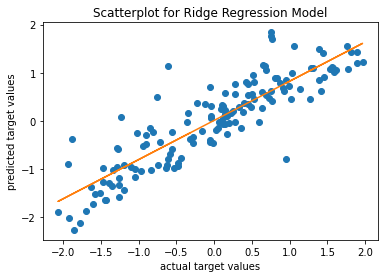

In [36]:

temp_brp = brp.copy()

X = temp_brp.values[:len(temp_brp)-1, 0:len(temp_brp.columns)-3]
Y = temp_brp.values[:len(temp_brp)-1, len(temp_brp.columns)-3:len(temp_brp.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Adding input sample to testing data.

y_test = np.insert(y_test, len(y_test), input_sample_actual[0], axis=0)
x_test = np.insert(x_test, len(x_test)-1, np.array((input_sample)), 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

RR_model_casual = Ridge(alpha=1.0,  fit_intercept=True, normalize=False, copy_X=True, max_iter=None, \
                         tol=0.001, solver='auto', random_state=None).fit(x_train, y_train[0:,0])
RR_model_registered = Ridge(alpha=1.0,  fit_intercept=True, normalize=False, copy_X=True, max_iter=None, \
                             tol=0.001, solver='auto', random_state=None).fit(x_train, y_train[0:,1])

import math

y_pred_c = RR_model_casual.predict(x_test)
y_pred_r = RR_model_registered.predict(x_test)

y_pred=[]
y_pred=np.array(y_pred)

for i in range(0, len(y_pred_c)):
    y_pred=np.insert(y_pred, len(y_pred), [y_pred_c[i], y_pred_r[i]], axis = 0)

size = int(len(y_pred)/2)
y_pred=y_pred.reshape(size, 2)

RR_mse = mean_squared_error(y_test, y_pred)
RR_mae = mean_absolute_error(y_test, y_pred)
RR_rmse =  math.sqrt(mean_squared_error(y_test, y_pred))
RR_r2score = r2_score(y_test, y_pred)

print("\nFor Testing dataset:\n")
print("mean square error",XGB_mse)
print("mean absolute error", XGB_mae)
print("Root mean square error",XGB_rmse)
print("\nr2 score: ", XGB_r2score)


##########################  Scatterplot ############################

yt = np.array(y_test[0:,1])
yp = np.array(y_pred[0:,1])
m, b = np.polyfit(yt, yp, 1)
plt.plot(yt, yp, 'o')
plt.plot(yt, m*yt + b) 
plt.title("Scatterplot for Ridge Regression Model") 
plt.xlabel("actual target values")
plt.ylabel("predicted target values") 
plt.show() 


## For input data


Actual value: 3118
Predicted value: 3622

For input data:
mean square error 3.084780998139808
mean absolute error 1.7562534970791652
Root mean square error 1.7563544625558385


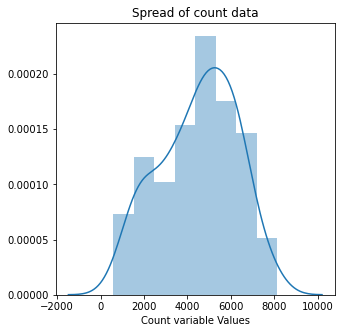

In [37]:
# dcv = destandardized_casual_values
# drv = destandardized_registered_values

dcv = y_pred[0:,0]*(casual_describe.std()) + casual_describe.mean() 
drv = y_pred[0:,1]*(registered_describe.std()) + registered_describe.mean() 

count_predicted_value=int(dcv[len(y_pred)-1] + drv[len(y_pred)-1])

print("\nActual value:", count_actual_value)
print("Predicted value:", count_predicted_value)

RR_mse = mean_squared_error(input_sample_actual, [y_pred[144]])
RR_mae = mean_absolute_error(input_sample_actual, [y_pred[144]])
RR_rmse = math.sqrt(mean_squared_error(input_sample_actual, [y_pred[144]]))

print("\nFor input data:")
print("mean square error", RR_mse)
print("mean absolute error",  RR_mae)
print("Root mean square error", RR_rmse)

##########################  Data distribution Curve  ##############################

plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dcv + drv)
plt.title("Spread of count data")
plt.xlabel("Count variable Values")
plt.show()
